Dùng thư viện yahoo finace tải dataset

In [51]:
import yfinance as yf

data = yf.download(tickers = "6C=F", start="2017-12-01", end="2023-06-16", interval='1d')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,0.77545,0.78870,0.77540,0.78780,0.78780,159130
2017-12-04,0.78715,0.79025,0.78585,0.78765,0.78765,74216
2017-12-05,0.78860,0.79225,0.78725,0.78760,0.78760,62736
2017-12-06,0.78800,0.79040,0.78090,0.78135,0.78135,87079
2017-12-07,0.78175,0.78220,0.77720,0.77755,0.77755,73507
...,...,...,...,...,...,...
2023-06-09,0.74870,0.75125,0.74800,0.74910,0.74910,88366
2023-06-12,0.74975,0.75115,0.74730,0.74795,0.74795,103912
2023-06-13,0.74820,0.75275,0.74760,0.75140,0.75140,98718


In [52]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,0.77545,0.78870,0.77540,0.78780,0.78780,159130
2017-12-04,0.78715,0.79025,0.78585,0.78765,0.78765,74216
2017-12-05,0.78860,0.79225,0.78725,0.78760,0.78760,62736
2017-12-06,0.78800,0.79040,0.78090,0.78135,0.78135,87079
2017-12-07,0.78175,0.78220,0.77720,0.77755,0.77755,73507
...,...,...,...,...,...,...
2023-06-09,0.74870,0.75125,0.74800,0.74910,0.74910,88366
2023-06-12,0.74975,0.75115,0.74730,0.74795,0.74795,103912
2023-06-13,0.74820,0.75275,0.74760,0.75140,0.75140,98718


In [53]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [54]:
data = data.reset_index('Date', inplace=False)

In [55]:
# 2. Đọc file dữ liệu giá vàng GC=F và chia train test validate theo tỉ lệ 7:2:1
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [56]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [58]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[0.78454538 0.78456493 0.78458448 0.78460403 0.78462358 0.78464313
 0.78466267 0.78468222 0.78470177 0.78472132 0.78474087 0.78476042
 0.78477997 0.78479952 0.78481907 0.78483862 0.78485816 0.78487771
 0.78489726 0.78491681 0.78493636 0.78495591 0.78497546 0.78499501
 0.78501456 0.78503411 0.78505366 0.7850732  0.78509275 0.7851123 ]


In [59]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 0.04346012322438639
Testing RMSE: 0.022674930119335593


Validation RMSE: 0.04346012322438639
Testing RMSE: 0.022674930119335593


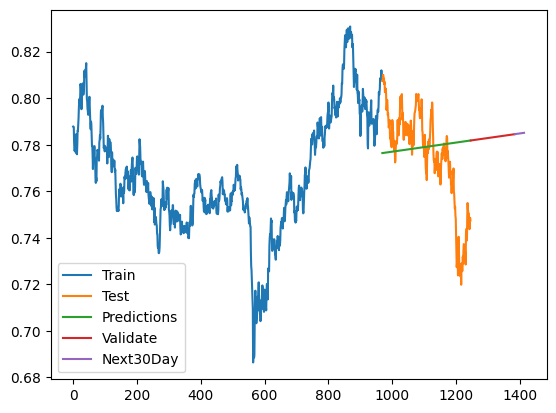

In [60]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()